# TRABAJO FINAL DE GRADO - PEC 3
###### Autor: Claudia Reina Fajardo
###### Noviembre 2021

## Modelo de Deep Learning

In [3]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as kr

In [4]:
# cargamos el dataset
df = pd.read_csv('data.csv')

In [66]:
# algoritmo red neuronal
def rn (nn, variable, e):
    # eliminamos la clase del conjunto de datos y los elementos sin clasificar y la guardamos para comprobar precisión
    data=df[df[variable]<2]
    Y=data[variable]
    X=data.drop([variable], axis=1).values
    
    # Definimos el ratio de aprendizaje, la distribución de las neuronas y la cantidad de entrenamientos
    lr = 0.001
    nn = nn
    e = e

    # Creamos el objeto que contendrá a nuestra red neuronal, como secuencia de capas.
    model = kr.Sequential()

    # Añadimos la capa 1
    l1 = model.add(kr.layers.Dense(nn[1], activation='relu'))

    # Añadimos la capa 2
    l2 = model.add(kr.layers.Dense(nn[2], activation='relu'))

    # Añadimos la capa 3, que corresponde a la salida de la red
    l3 = model.add(kr.layers.Dense(nn[3], activation='sigmoid'))

    # Compilamos el modelo, definiendo la función de coste y el optimizador.
    model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(0.001), metrics=['acc'])

    # Y entrenamos al modelo, añadiendo cortes de entrenamiento y la cantidad de entrenamientos que se hará. 
    training=model.fit(X, Y, validation_split = 0.33, epochs=e)

    # Recogemos accuracy total
    results=model.evaluate(X, Y)
    
    return model, training, results

### Red neuronal sobre depresión

#### Estructura 16-8-1

In [67]:
model1, training1, results1 = rn([2, 16, 8, 1], 'depressed', 70)

Epoch 1/70
105/105 [==============================] - 1s 3ms/step - loss: 0.1764 - acc: 0.7613 - val_loss: 0.1574 - val_acc: 0.7690
Epoch 2/70
105/105 [==============================] - 0s 3ms/step - loss: 0.1437 - acc: 0.7977 - val_loss: 0.1320 - val_acc: 0.8314
Epoch 3/70
105/105 [==============================] - 0s 2ms/step - loss: 0.1277 - acc: 0.8282 - val_loss: 0.1191 - val_acc: 0.8478
Epoch 4/70
105/105 [==============================] - 0s 2ms/step - loss: 0.1193 - acc: 0.8315 - val_loss: 0.1168 - val_acc: 0.8448
Epoch 5/70
105/105 [==============================] - 0s 2ms/step - loss: 0.1142 - acc: 0.8416 - val_loss: 0.1229 - val_acc: 0.8344
Epoch 6/70
105/105 [==============================] - 0s 2ms/step - loss: 0.1109 - acc: 0.8452 - val_loss: 0.1162 - val_acc: 0.8496
Epoch 7/70
105/105 [==============================] - 0s 2ms/step - loss: 0.1130 - acc: 0.8381 - val_loss: 0.1118 - val_acc: 0.8478
Epoch 8/70
105/105 [==============================] - 0s 2ms/step - loss: 0.

105/105 [==============================] - 0s 2ms/step - loss: 0.0943 - acc: 0.8718 - val_loss: 0.1112 - val_acc: 0.8623
Epoch 63/70
105/105 [==============================] - 0s 2ms/step - loss: 0.0951 - acc: 0.8730 - val_loss: 0.1126 - val_acc: 0.8532
Epoch 64/70
105/105 [==============================] - 0s 2ms/step - loss: 0.0936 - acc: 0.8733 - val_loss: 0.1104 - val_acc: 0.8545
Epoch 65/70
105/105 [==============================] - 0s 2ms/step - loss: 0.0934 - acc: 0.8763 - val_loss: 0.1116 - val_acc: 0.8563
Epoch 66/70
105/105 [==============================] - 0s 2ms/step - loss: 0.0943 - acc: 0.8742 - val_loss: 0.1125 - val_acc: 0.8551
Epoch 67/70
105/105 [==============================] - 0s 2ms/step - loss: 0.0945 - acc: 0.8721 - val_loss: 0.1130 - val_acc: 0.8514
Epoch 68/70
105/105 [==============================] - 0s 2ms/step - loss: 0.0932 - acc: 0.8745 - val_loss: 0.1151 - val_acc: 0.8526
Epoch 69/70
105/105 [==============================] - 0s 2ms/step - loss: 0.0939

| CALIDAD DEL MODELO |
 - Precisión               : 87.19%
 - Pérdida                 : 9.82%

| PROCESO DE APRENDIZAJE DEL MODELO |


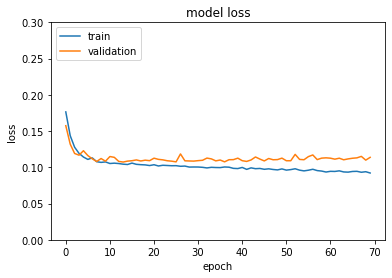

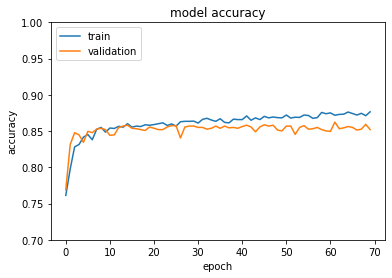

In [68]:
print('======================')
print('| CALIDAD DEL MODELO |')
print('======================')
print(' - Precisión               : '+str(np.round((100*results1[1]),2))+'%')
print(' - Pérdida                 : '+str(np.round((100*results1[0]),2))+'%')
print('')

print('===================================')
print('| PROCESO DE APRENDIZAJE DEL MODELO |')
print('===================================')
plt.ylim([0,0.3])
plt.plot(training1.history["loss"])
plt.plot(training1.history["val_loss"])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.ylim([0.7,1])
plt.plot(training1.history["acc"])
plt.plot(training1.history["val_acc"])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()



Observamos un poco de overfitting. Haremos el modelo más pequeño.

#### Estructura 10-2-1

In [69]:
model1_1, training1_1, results1_1 = rn([2, 10, 2, 1], 'depressed', 70)

Epoch 1/70
105/105 [==============================] - 1s 3ms/step - loss: 0.2110 - acc: 0.7580 - val_loss: 0.1879 - val_acc: 0.7514
Epoch 2/70
105/105 [==============================] - 0s 2ms/step - loss: 0.1786 - acc: 0.7574 - val_loss: 0.1721 - val_acc: 0.7520
Epoch 3/70
105/105 [==============================] - 0s 2ms/step - loss: 0.1642 - acc: 0.7589 - val_loss: 0.1586 - val_acc: 0.7520
Epoch 4/70
105/105 [==============================] - 0s 2ms/step - loss: 0.1528 - acc: 0.7589 - val_loss: 0.1486 - val_acc: 0.7520
Epoch 5/70
105/105 [==============================] - 0s 2ms/step - loss: 0.1460 - acc: 0.7927 - val_loss: 0.1430 - val_acc: 0.8211
Epoch 6/70
105/105 [==============================] - 0s 2ms/step - loss: 0.1402 - acc: 0.8118 - val_loss: 0.1375 - val_acc: 0.8344
Epoch 7/70
105/105 [==============================] - 0s 2ms/step - loss: 0.1355 - acc: 0.8204 - val_loss: 0.1332 - val_acc: 0.8399
Epoch 8/70
105/105 [==============================] - 0s 2ms/step - loss: 0.

105/105 [==============================] - 0s 3ms/step - loss: 0.0999 - acc: 0.8664 - val_loss: 0.1132 - val_acc: 0.8532
Epoch 63/70
105/105 [==============================] - 0s 3ms/step - loss: 0.1003 - acc: 0.8647 - val_loss: 0.1146 - val_acc: 0.8490
Epoch 64/70
105/105 [==============================] - 0s 3ms/step - loss: 0.0998 - acc: 0.8667 - val_loss: 0.1141 - val_acc: 0.8496
Epoch 65/70
105/105 [==============================] - 0s 3ms/step - loss: 0.0999 - acc: 0.8653 - val_loss: 0.1134 - val_acc: 0.8490
Epoch 66/70
105/105 [==============================] - 0s 3ms/step - loss: 0.0991 - acc: 0.8661 - val_loss: 0.1143 - val_acc: 0.8514
Epoch 67/70
105/105 [==============================] - 0s 3ms/step - loss: 0.1001 - acc: 0.8650 - val_loss: 0.1126 - val_acc: 0.8526
Epoch 68/70
105/105 [==============================] - 0s 3ms/step - loss: 0.1012 - acc: 0.8605 - val_loss: 0.1154 - val_acc: 0.8466
Epoch 69/70
105/105 [==============================] - 0s 3ms/step - loss: 0.0987

| CALIDAD DEL MODELO |
 - Precisión               : 86.09%
 - Pérdida                 : 10.63%

| PROCESO DE APRENDIZAJE DEL MODELO |


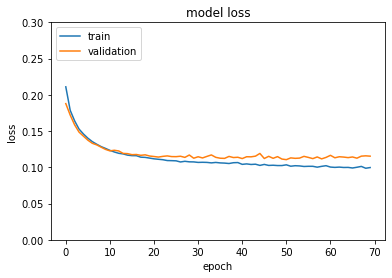

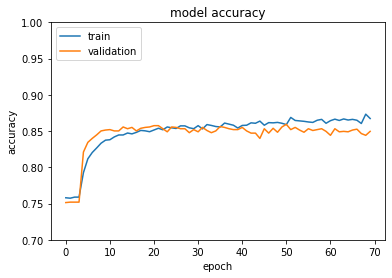

In [70]:
print('======================')
print('| CALIDAD DEL MODELO |')
print('======================')
print(' - Precisión               : '+str(np.round((100*results1_1[1]),2))+'%')
print(' - Pérdida                 : '+str(np.round((100*results1_1[0]),2))+'%')
print('')

print('===================================')
print('| PROCESO DE APRENDIZAJE DEL MODELO |')
print('===================================')
plt.ylim([0,0.3])
plt.plot(training1_1.history["loss"])
plt.plot(training1_1.history["val_loss"])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.ylim([0.7,1])
plt.plot(training1_1.history["acc"])
plt.plot(training1_1.history["val_acc"])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()



Como vemos, aunque presenta algún pequeño pico, el modelo es mucho más estable y sin sacrificar demasiada precisión.

Podemos probar a reducir la cantidad de entrenamientos:

In [71]:
model1_2, training1_2, results1_2 = rn([2, 10, 2, 1], 'depressed', 30)

Epoch 1/30
105/105 [==============================] - 1s 3ms/step - loss: 0.4511 - acc: 0.4993 - val_loss: 0.1912 - val_acc: 0.7520
Epoch 2/30
105/105 [==============================] - 0s 2ms/step - loss: 0.1832 - acc: 0.7589 - val_loss: 0.1832 - val_acc: 0.7520
Epoch 3/30
105/105 [==============================] - 0s 2ms/step - loss: 0.1764 - acc: 0.7589 - val_loss: 0.1754 - val_acc: 0.7520
Epoch 4/30
105/105 [==============================] - 0s 2ms/step - loss: 0.1661 - acc: 0.7589 - val_loss: 0.1617 - val_acc: 0.7526
Epoch 5/30
105/105 [==============================] - 0s 2ms/step - loss: 0.1541 - acc: 0.7586 - val_loss: 0.1492 - val_acc: 0.7526
Epoch 6/30
105/105 [==============================] - 0s 2ms/step - loss: 0.1450 - acc: 0.7595 - val_loss: 0.1417 - val_acc: 0.7526
Epoch 7/30
105/105 [==============================] - 0s 2ms/step - loss: 0.1388 - acc: 0.7625 - val_loss: 0.1345 - val_acc: 0.7641
Epoch 8/30
105/105 [==============================] - 0s 2ms/step - loss: 0.

| CALIDAD DEL MODELO |
 - Precisión               : 85.87%
 - Pérdida                 : 10.52%

| PROCESO DE APRENDIZAJE DEL MODELO |


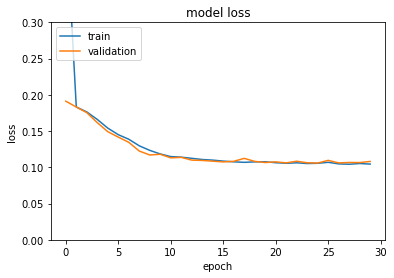

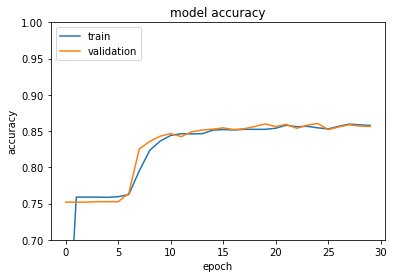

In [72]:
print('======================')
print('| CALIDAD DEL MODELO |')
print('======================')
print(' - Precisión               : '+str(np.round((100*results1_2[1]),2))+'%')
print(' - Pérdida                 : '+str(np.round((100*results1_2[0]),2))+'%')
print('')

print('===================================')
print('| PROCESO DE APRENDIZAJE DEL MODELO |')
print('===================================')
plt.ylim([0,0.3])
plt.plot(training1_2.history["loss"])
plt.plot(training1_2.history["val_loss"])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.ylim([0.7,1])
plt.plot(training1_2.history["acc"])
plt.plot(training1_2.history["val_acc"])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()



### Red neuronal sobre pensamientos de muerte

#### Estructura 16-8-1

In [73]:
model2, training2, results2 = rn([2, 16, 8, 1], 'dead', 70)

Epoch 1/70
105/105 [==============================] - 1s 3ms/step - loss: 0.2032 - acc: 0.7706 - val_loss: 0.0370 - val_acc: 0.9624
Epoch 2/70
105/105 [==============================] - 0s 2ms/step - loss: 0.0317 - acc: 0.9680 - val_loss: 0.0370 - val_acc: 0.9624
Epoch 3/70
105/105 [==============================] - 0s 2ms/step - loss: 0.0316 - acc: 0.9680 - val_loss: 0.0370 - val_acc: 0.9624
Epoch 4/70
105/105 [==============================] - 0s 2ms/step - loss: 0.0315 - acc: 0.9680 - val_loss: 0.0368 - val_acc: 0.9624
Epoch 5/70
105/105 [==============================] - 0s 2ms/step - loss: 0.0314 - acc: 0.9680 - val_loss: 0.0366 - val_acc: 0.9624
Epoch 6/70
105/105 [==============================] - 0s 2ms/step - loss: 0.0312 - acc: 0.9680 - val_loss: 0.0363 - val_acc: 0.9624
Epoch 7/70
105/105 [==============================] - 0s 2ms/step - loss: 0.0309 - acc: 0.9680 - val_loss: 0.0358 - val_acc: 0.9624
Epoch 8/70
105/105 [==============================] - 0s 2ms/step - loss: 0.

105/105 [==============================] - 0s 2ms/step - loss: 0.0142 - acc: 0.9851 - val_loss: 0.0349 - val_acc: 0.9588
Epoch 63/70
105/105 [==============================] - 0s 2ms/step - loss: 0.0134 - acc: 0.9854 - val_loss: 0.0367 - val_acc: 0.9545
Epoch 64/70
105/105 [==============================] - 0s 2ms/step - loss: 0.0154 - acc: 0.9824 - val_loss: 0.0346 - val_acc: 0.9588
Epoch 65/70
105/105 [==============================] - 0s 2ms/step - loss: 0.0127 - acc: 0.9866 - val_loss: 0.0357 - val_acc: 0.9570
Epoch 66/70
105/105 [==============================] - 0s 2ms/step - loss: 0.0136 - acc: 0.9851 - val_loss: 0.0355 - val_acc: 0.9594
Epoch 67/70
105/105 [==============================] - 0s 2ms/step - loss: 0.0132 - acc: 0.9863 - val_loss: 0.0375 - val_acc: 0.9533
Epoch 68/70
105/105 [==============================] - 0s 2ms/step - loss: 0.0131 - acc: 0.9866 - val_loss: 0.0383 - val_acc: 0.9521
Epoch 69/70
105/105 [==============================] - 0s 2ms/step - loss: 0.0126

| CALIDAD DEL MODELO |
 - Precisión               : 97.44%
 - Pérdida                 : 2.19%

| PROCESO DE APRENDIZAJE DEL MODELO |


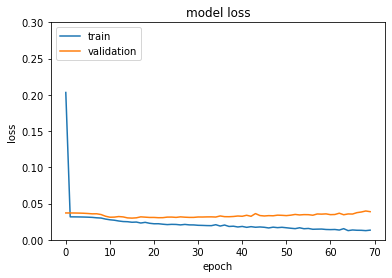

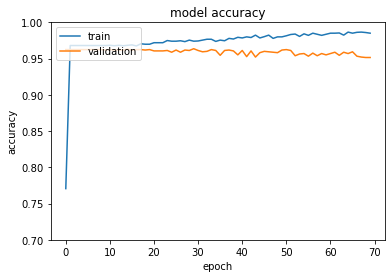

In [74]:
print('======================')
print('| CALIDAD DEL MODELO |')
print('======================')
print(' - Precisión               : '+str(np.round((100*results2[1]),2))+'%')
print(' - Pérdida                 : '+str(np.round((100*results2[0]),2))+'%')
print('')

print('===================================')
print('| PROCESO DE APRENDIZAJE DEL MODELO |')
print('===================================')
plt.ylim([0,0.3])
plt.plot(training2.history["loss"])
plt.plot(training2.history["val_loss"])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.ylim([0.7,1])
plt.plot(training2.history["acc"])
plt.plot(training2.history["val_acc"])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


Volvemos a observar overfitting. Probaremos con un modelo más pequeño.

#### Estructura 8-2-1

In [75]:
model2_1, training2_1, results2_1 = rn([2, 8, 2, 1], 'dead', 30)

Epoch 1/30
105/105 [==============================] - 1s 3ms/step - loss: 0.2673 - acc: 0.5768 - val_loss: 0.1604 - val_acc: 0.9618
Epoch 2/30
105/105 [==============================] - 0s 2ms/step - loss: 0.0738 - acc: 0.9680 - val_loss: 0.0422 - val_acc: 0.9624
Epoch 3/30
105/105 [==============================] - 0s 2ms/step - loss: 0.0348 - acc: 0.9680 - val_loss: 0.0378 - val_acc: 0.9624
Epoch 4/30
105/105 [==============================] - 0s 2ms/step - loss: 0.0325 - acc: 0.9680 - val_loss: 0.0371 - val_acc: 0.9624
Epoch 5/30
105/105 [==============================] - 0s 2ms/step - loss: 0.0319 - acc: 0.9680 - val_loss: 0.0369 - val_acc: 0.9624
Epoch 6/30
105/105 [==============================] - 0s 2ms/step - loss: 0.0317 - acc: 0.9680 - val_loss: 0.0368 - val_acc: 0.9624
Epoch 7/30
105/105 [==============================] - 0s 2ms/step - loss: 0.0316 - acc: 0.9680 - val_loss: 0.0368 - val_acc: 0.9624
Epoch 8/30
105/105 [==============================] - 0s 2ms/step - loss: 0.

| CALIDAD DEL MODELO |
 - Precisión               : 96.62%
 - Pérdida                 : 2.94%

| PROCESO DE APRENDIZAJE DEL MODELO |


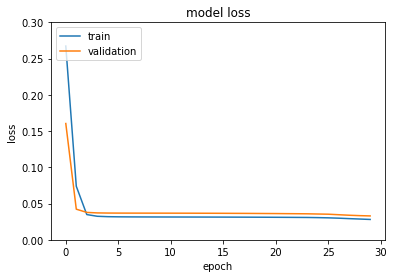

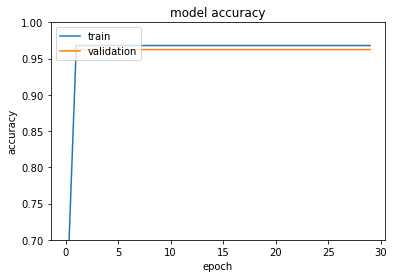

In [76]:
print('======================')
print('| CALIDAD DEL MODELO |')
print('======================')
print(' - Precisión               : '+str(np.round((100*results2_1[1]),2))+'%')
print(' - Pérdida                 : '+str(np.round((100*results2_1[0]),2))+'%')
print('')

print('===================================')
print('| PROCESO DE APRENDIZAJE DEL MODELO |')
print('===================================')
plt.ylim([0,0.3])
plt.plot(training2_1.history["loss"])
plt.plot(training2_1.history["val_loss"])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.ylim([0.7,1])
plt.plot(training2_1.history["acc"])
plt.plot(training2_1.history["val_acc"])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Aunque continúa habiendo una cierta discrepancia entre los resultados de entrenamiento y los da validación, vemos que las curvas son prácticamente paralelas y este modelo nos da menos pérdida que otros modelos que ofrecen mejores resultados.

### Red neuronal sobre insomnio

#### Estructura 16-8-1

In [77]:
model3, training3, results3 = rn([2, 16, 8, 1], 'sleep', 70)

Epoch 1/70
105/105 [==============================] - 1s 3ms/step - loss: 0.2657 - acc: 0.6094 - val_loss: 0.2306 - val_acc: 0.6515
Epoch 2/70
105/105 [==============================] - 0s 2ms/step - loss: 0.2146 - acc: 0.6766 - val_loss: 0.2079 - val_acc: 0.6976
Epoch 3/70
105/105 [==============================] - 0s 2ms/step - loss: 0.1996 - acc: 0.6972 - val_loss: 0.1938 - val_acc: 0.7248
Epoch 4/70
105/105 [==============================] - 0s 2ms/step - loss: 0.1909 - acc: 0.7160 - val_loss: 0.1866 - val_acc: 0.7297
Epoch 5/70
105/105 [==============================] - 0s 2ms/step - loss: 0.1868 - acc: 0.7265 - val_loss: 0.1862 - val_acc: 0.7303
Epoch 6/70
105/105 [==============================] - 0s 2ms/step - loss: 0.1845 - acc: 0.7342 - val_loss: 0.1846 - val_acc: 0.7309
Epoch 7/70
105/105 [==============================] - 0s 2ms/step - loss: 0.1820 - acc: 0.7253 - val_loss: 0.1829 - val_acc: 0.7327
Epoch 8/70
105/105 [==============================] - 0s 2ms/step - loss: 0.

105/105 [==============================] - 0s 2ms/step - loss: 0.1616 - acc: 0.7635 - val_loss: 0.1937 - val_acc: 0.7188
Epoch 63/70
105/105 [==============================] - 0s 2ms/step - loss: 0.1632 - acc: 0.7587 - val_loss: 0.1859 - val_acc: 0.7200
Epoch 64/70
105/105 [==============================] - 0s 2ms/step - loss: 0.1622 - acc: 0.7563 - val_loss: 0.1884 - val_acc: 0.7200
Epoch 65/70
105/105 [==============================] - 0s 2ms/step - loss: 0.1627 - acc: 0.7560 - val_loss: 0.1877 - val_acc: 0.7176
Epoch 66/70
105/105 [==============================] - 0s 2ms/step - loss: 0.1627 - acc: 0.7566 - val_loss: 0.1869 - val_acc: 0.7218
Epoch 67/70
105/105 [==============================] - 0s 3ms/step - loss: 0.1617 - acc: 0.7632 - val_loss: 0.1852 - val_acc: 0.7279
Epoch 68/70
105/105 [==============================] - 0s 2ms/step - loss: 0.1613 - acc: 0.7620 - val_loss: 0.1867 - val_acc: 0.7242
Epoch 69/70
105/105 [==============================] - 0s 2ms/step - loss: 0.1620

| CALIDAD DEL MODELO |
 - Precisión               : 75.04%
 - Pérdida                 : 17.14%

| PROCESO DE APRENDIZAJE DEL MODELO |


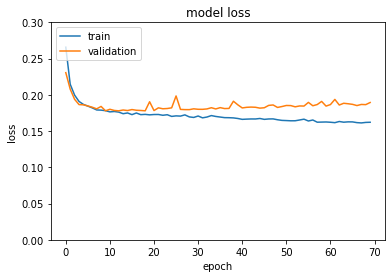

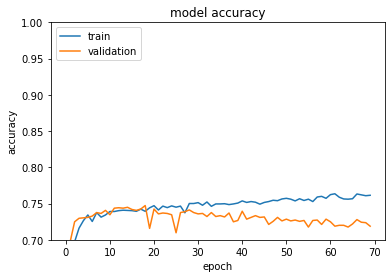

In [78]:
print('======================')
print('| CALIDAD DEL MODELO |')
print('======================')
print(' - Precisión               : '+str(np.round((100*results3[1]),2))+'%')
print(' - Pérdida                 : '+str(np.round((100*results3[0]),2))+'%')
print('')

print('===================================')
print('| PROCESO DE APRENDIZAJE DEL MODELO |')
print('===================================')
plt.ylim([0.0,0.3])
plt.plot(training3.history["loss"])
plt.plot(training3.history["val_loss"])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.ylim([0.7,1])
plt.plot(training3.history["acc"])
plt.plot(training3.history["val_acc"])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


De nuevo overfitting. Probemos con un modelo más pequeño.

#### Estructura 8-4-1

In [79]:
model3_1, training3_1, results3_1 = rn([2, 8, 4, 1], 'sleep', 30)

Epoch 1/30
105/105 [==============================] - 1s 5ms/step - loss: 0.3171 - acc: 0.5094 - val_loss: 0.2292 - val_acc: 0.6321
Epoch 2/30
105/105 [==============================] - 0s 2ms/step - loss: 0.2247 - acc: 0.6345 - val_loss: 0.2238 - val_acc: 0.6448
Epoch 3/30
105/105 [==============================] - 0s 3ms/step - loss: 0.2154 - acc: 0.6560 - val_loss: 0.2120 - val_acc: 0.6806
Epoch 4/30
105/105 [==============================] - 0s 3ms/step - loss: 0.2044 - acc: 0.6963 - val_loss: 0.2014 - val_acc: 0.7042
Epoch 5/30
105/105 [==============================] - 0s 2ms/step - loss: 0.1949 - acc: 0.7065 - val_loss: 0.1957 - val_acc: 0.7127
Epoch 6/30
105/105 [==============================] - 0s 2ms/step - loss: 0.1898 - acc: 0.7178 - val_loss: 0.1913 - val_acc: 0.7176
Epoch 7/30
105/105 [==============================] - 0s 2ms/step - loss: 0.1866 - acc: 0.7208 - val_loss: 0.1874 - val_acc: 0.7267
Epoch 8/30
105/105 [==============================] - 0s 2ms/step - loss: 0.

| CALIDAD DEL MODELO |
 - Precisión               : 74.17%
 - Pérdida                 : 17.53%

| PROCESO DE APRENDIZAJE DEL MODELO |


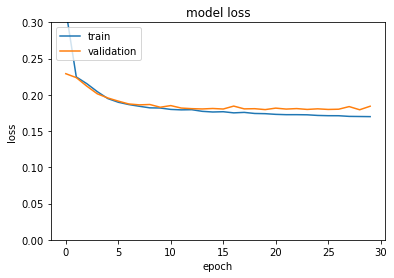

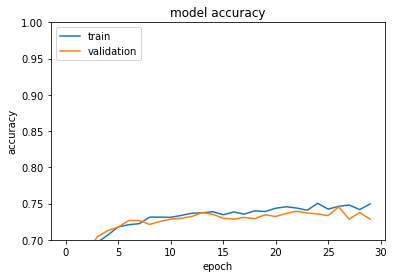

In [80]:
print('======================')
print('| CALIDAD DEL MODELO |')
print('======================')
print(' - Precisión               : '+str(np.round((100*results3_1[1]),2))+'%')
print(' - Pérdida                 : '+str(np.round((100*results3_1[0]),2))+'%')
print('')

print('===================================')
print('| PROCESO DE APRENDIZAJE DEL MODELO |')
print('===================================')
plt.ylim([0.0,0.3])
plt.plot(training3_1.history["loss"])
plt.plot(training3_1.history["val_loss"])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.ylim([0.7,1])
plt.plot(training3_1.history["acc"])
plt.plot(training3_1.history["val_acc"])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Observamos que el modelo presenta más estabilidad.

### Red neuronal sobre autoestima

#### Estructura 16-8-1

In [81]:
model4, training4, results4 = rn([2, 16, 8, 1], 'yourself', 70)

Epoch 1/70
105/105 [==============================] - 1s 3ms/step - loss: 0.1453 - acc: 0.8283 - val_loss: 0.1374 - val_acc: 0.8170
Epoch 2/70
105/105 [==============================] - 0s 2ms/step - loss: 0.1287 - acc: 0.8330 - val_loss: 0.1258 - val_acc: 0.8267
Epoch 3/70
105/105 [==============================] - 0s 2ms/step - loss: 0.1166 - acc: 0.8471 - val_loss: 0.1180 - val_acc: 0.8358
Epoch 4/70
105/105 [==============================] - 0s 2ms/step - loss: 0.1119 - acc: 0.8495 - val_loss: 0.1096 - val_acc: 0.8455
Epoch 5/70
105/105 [==============================] - 0s 2ms/step - loss: 0.1071 - acc: 0.8548 - val_loss: 0.1063 - val_acc: 0.8570
Epoch 6/70
105/105 [==============================] - 0s 2ms/step - loss: 0.1033 - acc: 0.8587 - val_loss: 0.1062 - val_acc: 0.8533
Epoch 7/70
105/105 [==============================] - 0s 2ms/step - loss: 0.0999 - acc: 0.8680 - val_loss: 0.1066 - val_acc: 0.8473
Epoch 8/70
105/105 [==============================] - 0s 2ms/step - loss: 0.

105/105 [==============================] - 0s 2ms/step - loss: 0.0788 - acc: 0.8978 - val_loss: 0.1020 - val_acc: 0.8576
Epoch 63/70
105/105 [==============================] - 0s 2ms/step - loss: 0.0789 - acc: 0.8987 - val_loss: 0.1035 - val_acc: 0.8552
Epoch 64/70
105/105 [==============================] - 0s 2ms/step - loss: 0.0784 - acc: 0.8981 - val_loss: 0.1026 - val_acc: 0.8588
Epoch 65/70
105/105 [==============================] - 0s 2ms/step - loss: 0.0785 - acc: 0.8961 - val_loss: 0.1030 - val_acc: 0.8539
Epoch 66/70
105/105 [==============================] - 0s 2ms/step - loss: 0.0772 - acc: 0.8996 - val_loss: 0.1030 - val_acc: 0.8600
Epoch 67/70
105/105 [==============================] - 0s 2ms/step - loss: 0.0787 - acc: 0.9002 - val_loss: 0.1045 - val_acc: 0.8552
Epoch 68/70
105/105 [==============================] - 0s 2ms/step - loss: 0.0777 - acc: 0.8993 - val_loss: 0.1042 - val_acc: 0.8521
Epoch 69/70
105/105 [==============================] - 0s 2ms/step - loss: 0.0777

| CALIDAD DEL MODELO |
 - Precisión               : 88.5%
 - Pérdida                 : 8.64%

| PROCESO DE APRENDIZAJE DEL MODELO |


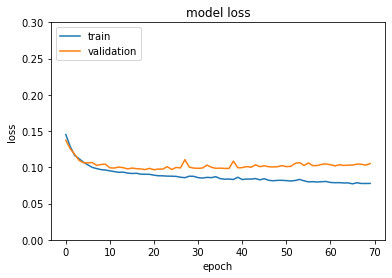

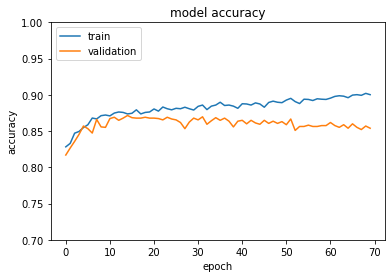

In [82]:
print('======================')
print('| CALIDAD DEL MODELO |')
print('======================')
print(' - Precisión               : '+str(np.round((100*results4[1]),2))+'%')
print(' - Pérdida                 : '+str(np.round((100*results4[0]),2))+'%')
print('')

print('===================================')
print('| PROCESO DE APRENDIZAJE DEL MODELO |')
print('===================================')
plt.ylim([0,0.3])
plt.plot(training4.history["loss"])
plt.plot(training4.history["val_loss"])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.ylim([0.7,1])
plt.plot(training4.history["acc"])
plt.plot(training4.history["val_acc"])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


De nuevo vemos el overfitting representado por la linea de validación alejándose de la de entrenamiento.

Redimensionamos en modelo.

#### Estructura 8-4-1

In [83]:
model4_1, training4_1, results4_1 = rn([2, 8, 4, 1], 'yourself', 30)

Epoch 1/30
105/105 [==============================] - 1s 3ms/step - loss: 0.2596 - acc: 0.5830 - val_loss: 0.1611 - val_acc: 0.8206
Epoch 2/30
105/105 [==============================] - 0s 2ms/step - loss: 0.1477 - acc: 0.8289 - val_loss: 0.1514 - val_acc: 0.8206
Epoch 3/30
105/105 [==============================] - 0s 2ms/step - loss: 0.1405 - acc: 0.8289 - val_loss: 0.1439 - val_acc: 0.8206
Epoch 4/30
105/105 [==============================] - 0s 2ms/step - loss: 0.1350 - acc: 0.8289 - val_loss: 0.1386 - val_acc: 0.8206
Epoch 5/30
105/105 [==============================] - 0s 2ms/step - loss: 0.1299 - acc: 0.8289 - val_loss: 0.1323 - val_acc: 0.8200
Epoch 6/30
105/105 [==============================] - 0s 2ms/step - loss: 0.1233 - acc: 0.8306 - val_loss: 0.1248 - val_acc: 0.8267
Epoch 7/30
105/105 [==============================] - 0s 3ms/step - loss: 0.1154 - acc: 0.8420 - val_loss: 0.1176 - val_acc: 0.8303
Epoch 8/30
105/105 [==============================] - 0s 2ms/step - loss: 0.

| CALIDAD DEL MODELO |
 - Precisión               : 87.52%
 - Pérdida                 : 9.19%

| PROCESO DE APRENDIZAJE DEL MODELO |


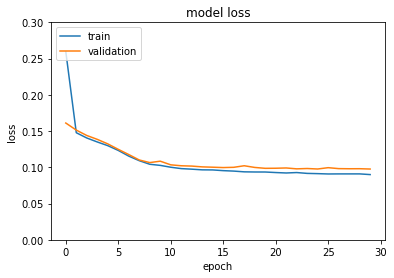

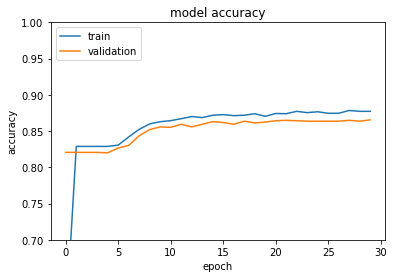

In [84]:
print('======================')
print('| CALIDAD DEL MODELO |')
print('======================')
print(' - Precisión               : '+str(np.round((100*results4_1[1]),2))+'%')
print(' - Pérdida                 : '+str(np.round((100*results4_1[0]),2))+'%')
print('')

print('===================================')
print('| PROCESO DE APRENDIZAJE DEL MODELO |')
print('===================================')
plt.ylim([0,0.3])
plt.plot(training4_1.history["loss"])
plt.plot(training4_1.history["val_loss"])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.ylim([0.7,1])
plt.plot(training4_1.history["acc"])
plt.plot(training4_1.history["val_acc"])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

### Red neuronal sobre visita en salud mental

#### Estructura 16-8-1

In [86]:
model5, training5, results5 = rn([2, 16, 8, 1], 'profMental', 70)

Epoch 1/70
105/105 [==============================] - 1s 3ms/step - loss: 0.0811 - acc: 0.9128 - val_loss: 0.0761 - val_acc: 0.9176
Epoch 2/70
105/105 [==============================] - 0s 2ms/step - loss: 0.0776 - acc: 0.9151 - val_loss: 0.0741 - val_acc: 0.9170
Epoch 3/70
105/105 [==============================] - 0s 2ms/step - loss: 0.0748 - acc: 0.9151 - val_loss: 0.0712 - val_acc: 0.9176
Epoch 4/70
105/105 [==============================] - 0s 2ms/step - loss: 0.0721 - acc: 0.9157 - val_loss: 0.0695 - val_acc: 0.9170
Epoch 5/70
105/105 [==============================] - 0s 3ms/step - loss: 0.0706 - acc: 0.9172 - val_loss: 0.0700 - val_acc: 0.9170
Epoch 6/70
105/105 [==============================] - 0s 2ms/step - loss: 0.0695 - acc: 0.9172 - val_loss: 0.0692 - val_acc: 0.9164
Epoch 7/70
105/105 [==============================] - 0s 2ms/step - loss: 0.0680 - acc: 0.9190 - val_loss: 0.0723 - val_acc: 0.9133
Epoch 8/70
105/105 [==============================] - 0s 2ms/step - loss: 0.

105/105 [==============================] - 0s 2ms/step - loss: 0.0531 - acc: 0.9376 - val_loss: 0.0752 - val_acc: 0.9121
Epoch 63/70
105/105 [==============================] - 0s 2ms/step - loss: 0.0525 - acc: 0.9399 - val_loss: 0.0733 - val_acc: 0.9158
Epoch 64/70
105/105 [==============================] - 0s 2ms/step - loss: 0.0524 - acc: 0.9399 - val_loss: 0.0756 - val_acc: 0.9115
Epoch 65/70
105/105 [==============================] - 0s 2ms/step - loss: 0.0528 - acc: 0.9393 - val_loss: 0.0743 - val_acc: 0.9121
Epoch 66/70
105/105 [==============================] - 0s 2ms/step - loss: 0.0519 - acc: 0.9393 - val_loss: 0.0743 - val_acc: 0.9133
Epoch 67/70
105/105 [==============================] - 0s 2ms/step - loss: 0.0524 - acc: 0.9385 - val_loss: 0.0736 - val_acc: 0.9139
Epoch 68/70
105/105 [==============================] - 0s 2ms/step - loss: 0.0510 - acc: 0.9399 - val_loss: 0.0749 - val_acc: 0.9133
Epoch 69/70
105/105 [==============================] - 0s 2ms/step - loss: 0.0519

| CALIDAD DEL MODELO |
 - Precisión               : 93.08%
 - Pérdida                 : 6.01%

| PROCESO DE APRENDIZAJE DEL MODELO |


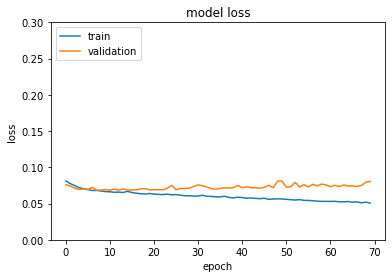

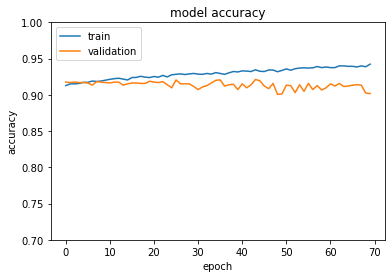

In [87]:
print('======================')
print('| CALIDAD DEL MODELO |')
print('======================')
print(' - Precisión               : '+str(np.round((100*results5[1]),2))+'%')
print(' - Pérdida                 : '+str(np.round((100*results5[0]),2))+'%')
print('')

print('===================================')
print('| PROCESO DE APRENDIZAJE DEL MODELO |')
print('===================================')
plt.ylim([0,0.3])
plt.plot(training5.history["loss"])
plt.plot(training5.history["val_loss"])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.ylim([0.7,1])
plt.plot(training5.history["acc"])
plt.plot(training5.history["val_acc"])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


Redimensionamos.

#### Estructura 8-4-1

In [88]:
model5_1, training5_1, results5_1 = rn([2, 8, 4, 1], 'profMental', 30)

Epoch 1/30
105/105 [==============================] - 1s 3ms/step - loss: 0.0813 - acc: 0.9151 - val_loss: 0.0761 - val_acc: 0.9176
Epoch 2/30
105/105 [==============================] - 0s 2ms/step - loss: 0.0785 - acc: 0.9151 - val_loss: 0.0748 - val_acc: 0.9176
Epoch 3/30
105/105 [==============================] - 0s 2ms/step - loss: 0.0765 - acc: 0.9151 - val_loss: 0.0739 - val_acc: 0.9176
Epoch 4/30
105/105 [==============================] - 0s 2ms/step - loss: 0.0749 - acc: 0.9151 - val_loss: 0.0725 - val_acc: 0.9176
Epoch 5/30
105/105 [==============================] - 0s 2ms/step - loss: 0.0733 - acc: 0.9151 - val_loss: 0.0720 - val_acc: 0.9176
Epoch 6/30
105/105 [==============================] - 0s 2ms/step - loss: 0.0725 - acc: 0.9154 - val_loss: 0.0705 - val_acc: 0.9176
Epoch 7/30
105/105 [==============================] - 0s 2ms/step - loss: 0.0710 - acc: 0.9151 - val_loss: 0.0704 - val_acc: 0.9176
Epoch 8/30
105/105 [==============================] - 0s 2ms/step - loss: 0.

| CALIDAD DEL MODELO |
 - Precisión               : 92.48%
 - Pérdida                 : 6.4%

| PROCESO DE APRENDIZAJE DEL MODELO |


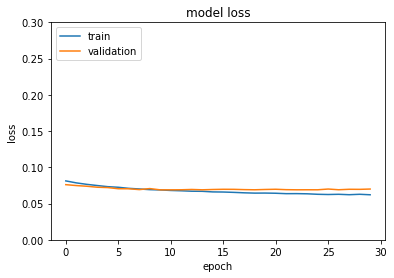

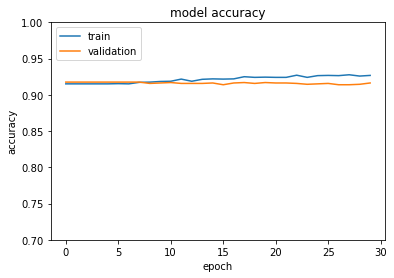

In [89]:
print('======================')
print('| CALIDAD DEL MODELO |')
print('======================')
print(' - Precisión               : '+str(np.round((100*results5_1[1]),2))+'%')
print(' - Pérdida                 : '+str(np.round((100*results5_1[0]),2))+'%')
print('')

print('===================================')
print('| PROCESO DE APRENDIZAJE DEL MODELO |')
print('===================================')
plt.ylim([0,0.3])
plt.plot(training5_1.history["loss"])
plt.plot(training5_1.history["val_loss"])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.ylim([0.7,1])
plt.plot(training5_1.history["acc"])
plt.plot(training5_1.history["val_acc"])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

## Pruebas de predicción del modelo de Deep Learning

### Depresión

In [26]:
# probamos con aquellos valores que no se habían clasificado
prob=df[df.depressed>1]
prob=prob.drop(['depressed'], axis=1).values

# entrenamos el modelo con mejores resultados
new=model1_2.predict(prob)
print('==============================')
print('| RESULTADO DE LA PREDICCIÓN |')
print('==============================')
for i in range(prob.shape[0]):
    print(' - Datos sin clasificar        : '+str(prob[i,:]))
    print(' - Clasificación        : '+str(np.round((new[i]),0)))
    print('')

| RESULTADO DE LA PREDICCIÓN |
 - Datos sin clasificar        : [ 0.  49.   6.   0.   2.   1.   4.   2.   0.   0.   3.4  0.   1.   0.
  2.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   1.   0.   0.
  0.   0.   0.   1.   1.   3.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  1.   0.   1.   0.   0.   0.   3.   9.   9.   9.   9.   5. ]
 - Clasificación        : [0.]

 - Datos sin clasificar        : [ 1.   63.    6.    0.    2.    1.    4.    1.    0.    2.    2.73  1.
  0.    0.    2.    0.    0.    1.    1.    0.    1.    1.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    4.    2.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    1.    1.    1.    0.    0.    0.
  0.    0.    2.    9.    9.    9.    9.    1.  ]
 - Clasificación        : [0.]

 - Datos sin clasificar        : [ 1.   80.    1.    0.    2.    2.    4.    0.    1.    1. 

### Pensamientos de muerte

In [51]:
# probamos con aquellos valores que no se habían clasificado
prob=df[df.dead>1]
prob=prob.drop(['dead'], axis=1).values

# entrenamos el modelo con mejores resultados
new=model2_1.predict(prob)
print('==============================')
print('| RESULTADO DE LA PREDICCIÓN |')
print('==============================')
for i in range(prob.shape[0]):
    print(' - Datos sin clasificar        : '+str(prob[i,:]))
    print(' - Clasificación        : '+str(np.round((new[i]),0)))
    print('')

| RESULTADO DE LA PREDICCIÓN |
 - Datos sin clasificar        : [ 1.   61.    3.    0.    1.    2.    4.    1.    1.    1.    1.23  1.
  1.    1.    3.    1.    0.    1.    1.    1.    1.    1.    1.    1.
  1.    1.    0.    0.    0.    0.    0.    1.    5.    2.    0.    0.
  0.    0.    0.    0.    0.    0.    1.    0.    1.    0.    0.    1.
  1.    0.    0.    1.    0.    1.    0.    0.    0.    5.    5.    0.
  0.    1.    3.    9.    9.    9.    9.    2.  ]
 - Clasificación        : [0.]

 - Datos sin clasificar        : [ 0.   54.    1.    0.    1.    3.    3.    0.    0.    2.    0.77  1.
  0.    0.    3.    0.    0.    0.    0.    0.    0.    1.    1.    1.
  1.    0.    1.    0.    1.    0.    0.    0.    4.    3.    0.    0.
  0.    0.    1.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    1.    1.    0.    3.    1.    0.
  0.    1.    2.    1.    1.    9.    9.    3.  ]
 - Clasificación        : [0.]



### Insomnio

In [103]:
# probamos con aquellos valores que no se habían clasificado
prob=df[df.sleep>1]
prob=prob.drop(['sleep'], axis=1).values

# entrenamos el modelo con mejores resultados
new=model3_1.predict(prob)
print('==============================')
print('| RESULTADO DE LA PREDICCIÓN |')
print('==============================')
for i in range(prob.shape[0]):
    print(' - Datos sin clasificar        : '+str(prob[i,:]))
    print(' - Clasificación        : '+str(np.round((new[i]),0)))
    print('')

| RESULTADO DE LA PREDICCIÓN |
 - Datos sin clasificar        : [ 2.   74.    2.    2.    1.    1.    3.    0.    0.    2.    0.77  1.
  2.    2.    3.    2.    1.    2.    2.    2.    2.    0.    0.    0.
  0.    0.    0.    0.    0.    2.    2.    1.    3.    3.    0.    2.
  2.    2.    2.    2.    1.    2.    2.    2.    2.    2.    2.    2.
  1.    2.    2.    2.    2.    1.    1.    1.    4.    5.    0.    2.
  2.    1.    2.    9.    9.    9.    9.    3.  ]
 - Clasificación        : [0.]



### Autoestima

In [85]:
# probamos con aquellos valores que no se habían clasificado
prob=df[df.yourself>1]
prob=prob.drop(['yourself'], axis=1).values

# entrenamos el modelo con mejores resultados
new=model4_1.predict(prob)
print('==============================')
print('| RESULTADO DE LA PREDICCIÓN |')
print('==============================')
for i in range(prob.shape[0]):
    print(' - Datos sin clasificar        : '+str(prob[i,:]))
    print(' - Clasificación        : '+str(np.round((new[i]),0)))
    print('')

| RESULTADO DE LA PREDICCIÓN |
 - Datos sin clasificar        : [ 1. 80.  3.  0.  1.  1.  2.  0.  0.  2.  5.  1.  1.  0.  3.  0.  0.  0.
  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  4.  3.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  2.  1.  0.  0.  0.  3.  1.  9.  9.  9.  4.]
 - Clasificación        : [0.]

 - Datos sin clasificar        : [ 1.   80.    1.    0.    2.    2.    4.    0.    1.    1.    2.76  0.
  0.    0.    3.    0.    0.    1.    1.    1.    1.    0.    9.    0.
  1.    0.    0.    0.    1.    0.    0.    1.    2.    3.    0.    0.
  0.    0.    1.    0.    1.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    4.    0.    0.
  0.    0.    2.    9.    9.    9.    9.    2.  ]
 - Clasificación        : [1.]



### Visita a salud mental

In [90]:
# probamos con aquellos valores que no se habían clasificado
prob=df[df.profMental>1]
prob=prob.drop(['profMental'], axis=1).values

# entrenamos el modelo con mejores resultados
new=model5_1.predict(prob)
print('==============================')
print('| RESULTADO DE LA PREDICCIÓN |')
print('==============================')
for i in range(prob.shape[0]):
    print(' - Datos sin clasificar        : '+str(prob[i,:]))
    print(' - Clasificación        : '+str(np.round((new[i]),0)))
    print('')

| RESULTADO DE LA PREDICCIÓN |
 - Datos sin clasificar        : [ 1.   68.    6.    0.    2.    1.    5.    1.    0.    2.    0.86  0.
  9.    1.    3.    1.    0.    0.    1.    0.    1.    0.    0.    1.
  1.    0.    0.    0.    0.    0.    0.    0.    1.    5.    1.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    1.    0.    0.
  0.    0.    3.    9.    9.    9.    9.    1.  ]
 - Clasificación        : [0.]

 - Datos sin clasificar        : [ 0.   47.    3.    0.    2.    3.    1.    0.    0.    0.    3.26  1.
  1.    0.    3.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  1.    1.    1.    0.    0.    0.    0.    0.    1.    3.    2.    0.
  0.    0.    1.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    1.    0.    0.    0.    1.    1.    1.    3.    1.    0.
  1.    1.    2.    9.    1.    9.    9.    3.  ]
 - Clasificación        : [0.]

 - Datos sin clasificar      